In [69]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch, Hyperband
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_absolute_percentage_error

In [70]:
# Create lagged DataFrame
def create_lagged_df(df, lags):
    df_lagged = pd.DataFrame()
    for i in range(lags+1):
        if i == 0:
            df_lagged['t'] = df['SPACE1-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'] + df['SPACE2-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'] + df['SPACE3-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'] + df['SPACE4-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'] + df['SPACE5-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]']
        else:
            df_lagged['t-'+str(i)] = df['SPACE1-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i) + df['SPACE2-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i) + df['SPACE3-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i) + df['SPACE4-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i) + df['SPACE5-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i)
    return df_lagged.dropna()
df1 = pd.read_csv('EnergyPlus Models/1D.csv')
df1 = create_lagged_df(df1, 4)
df3 = pd.read_csv('EnergyPlus Models/3000D.csv')
df3 = create_lagged_df(df3, 4)
df6 = pd.read_csv('EnergyPlus Models/6000D.csv')
df6 = create_lagged_df(df6, 4)

In [71]:
train, test = train_test_split(df1, test_size=0.2, random_state=42, shuffle=False)
xTrain = np.c_[train['t-1'], train['t-2'], train['t-3']]
xTest = np.c_[test['t-1'], test['t-2'], test['t-3']]
yTrain = train['t'].to_numpy()
yTest = test['t'].to_numpy()

In [72]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(3,1)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer="adam", loss="mean_absolute_error")
    return model
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
early_stopping_callback = EarlyStopping(monitor='loss', patience=15)
tuner = RandomSearch(build_model, objective='val_loss', max_trials=10)
tuner.search(xTrain, yTrain, epochs=300, verbose=1, callbacks=[early_stopping_callback])
model = tuner.get_best_models(num_models=1)[0]
model.fit(xTrain, yTrain, epochs=100, callbacks=[early_stopping_callback])
results = model.predict(xTest)

Trial 1 Complete [00h 00m 03s]

Best val_loss So Far: None
Total elapsed time: 00h 00m 03s
Epoch 1/100


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4714.4980 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4711.6763  
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4711.6982  
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4712.0522  
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4712.5537 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4712.9990 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4713.3594  
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4713.6460  
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4713.7578  
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4713.7319 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4713.6060 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4713.4072  
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4714.0571  
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4713.6328  
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - los

Testing accuracy (MAPE):  0.6111946630261634


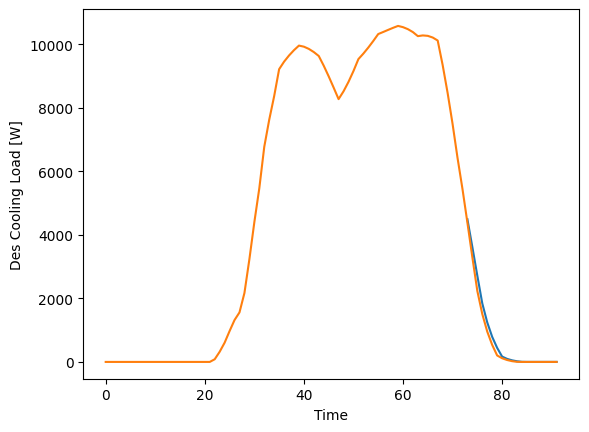

In [73]:
def func(x):
    while type(x) is np.ndarray:
        x = x[0]
    return x
results = list(map(func, results))
print("Testing accuracy (MAPE): ", mean_absolute_percentage_error(results, yTest))
plt.xlabel("Time")
plt.ylabel("Des Cooling Load [W]")
plt.plot(np.arange(start=len(xTrain), stop=len(xTrain)+len(results)), results)
plt.plot(np.arange(len(df1['t'].to_numpy())), df1['t'].to_numpy())
plt.show()

In [74]:
def create_lagged_df(df, lags):
    df_lagged = pd.DataFrame()
    for i in range(lags+1):
        if i == 0:
            df_lagged['t'] = df['SPACE1-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'] + df['SPACE2-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'] + df['SPACE3-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'] + df['SPACE4-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'] + df['SPACE5-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]']
        else:
            df_lagged['t-'+str(i)] = df['SPACE1-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i) + df['SPACE2-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i) + df['SPACE3-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i) + df['SPACE4-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i) + df['SPACE5-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i)
    return df_lagged.dropna()

df1 = pd.read_csv('EnergyPlus Models/1D.csv')
df1 = create_lagged_df(df1, 4)
df3 = pd.read_csv('EnergyPlus Models/3000D.csv')
df3 = create_lagged_df(df3, 4)
df6 = pd.read_csv('EnergyPlus Models/6000D.csv')
df6 = create_lagged_df(df6, 4)

In [75]:
train, test = train_test_split(df1, test_size=0.2, random_state=42, shuffle=False)
xTrain = np.c_[train['t-1'], train['t-2'], train['t-3']]
xTest = np.c_[test['t-1'], test['t-2'], test['t-3']]
yTrain = train['t'].to_numpy()
yTest = test['t'].to_numpy()

In [76]:
model.fit(xTrain, yTrain, epochs=100, callbacks=[early_stopping_callback])
results = model.predict(xTest)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2317.3960 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1579.0005 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 581.5873  
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 452.9925 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 834.9015 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 657.8845  
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 200.1916  
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 349.7224 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 399.2524 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 145.2148  
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 220.3294  
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 187.1772  
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 75.0643
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 90.3479  
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

Testing accuracy (MAPE):  0.0010538296007282291


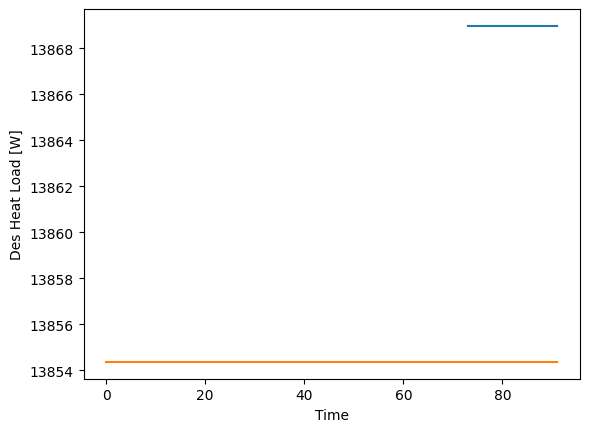

In [77]:
results = list(map(func, results))
print("Testing accuracy (MAPE): ", mean_absolute_percentage_error(results, yTest))
plt.xlabel("Time")
plt.ylabel("Des Heat Load [W]")
plt.plot(np.arange(start=len(xTrain), stop=len(xTrain)+len(results)), results)
plt.plot(np.arange(len(df1['t'].to_numpy())), df1['t'].to_numpy())
plt.show()

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4901.2241 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4920.7090  
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4914.9893 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4894.3525  
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4889.6606  
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4891.5586  
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4893.5020  
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - loss: 4894.1465
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4893.4785  
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4892.1416  
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4890.8721 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4889.8643  
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4889.5239 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4889.7095
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9m

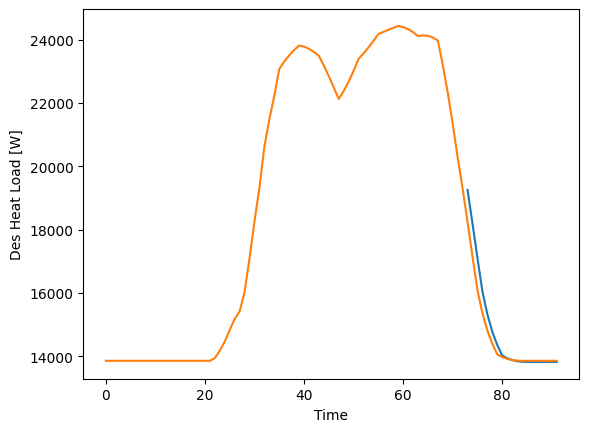

In [78]:
def create_lagged_df(df, lags):
    df_lagged = pd.DataFrame()
    for i in range(lags+1):
        if i == 0:
            df_lagged['t'] = df['SPACE1-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'] + df['SPACE2-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'] + df['SPACE3-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'] + df['SPACE4-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'] + df['SPACE5-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'] + df['SPACE1-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'] + df['SPACE2-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'] + df['SPACE3-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'] + df['SPACE4-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'] + df['SPACE5-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]']
        else:
            df_lagged['t-'+str(i)] = df['SPACE1-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i) + df['SPACE2-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i) + df['SPACE3-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i) + df['SPACE4-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i) + df['SPACE5-1:CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB:Des Heat Load [W]'].shift(i) + df['SPACE1-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i) + df['SPACE2-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i) + df['SPACE3-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i) + df['SPACE4-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i) + df['SPACE5-1:CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB:Des Sens Cool Load [W]'].shift(i)
    return df_lagged.dropna()

df1 = pd.read_csv('EnergyPlus Models/1D.csv')
df1 = create_lagged_df(df1, 4)
train, test = train_test_split(df1, test_size=0.2, random_state=42, shuffle=False)
xTrain = np.c_[train['t-1'], train['t-2'], train['t-3']]
xTest = np.c_[test['t-1'], test['t-2'], test['t-3']]
yTrain = train['t'].to_numpy()
yTest = test['t'].to_numpy()

model.fit(xTrain, yTrain, epochs=100, callbacks=[early_stopping_callback])
results = model.predict(xTest)

results = list(map(func, results))
print("Testing accuracy (MAPE): ", mean_absolute_percentage_error(results, yTest))
plt.xlabel("Time")
plt.ylabel("Des Heat Load [W]")
plt.plot(np.arange(start=len(xTrain), stop=len(xTrain)+len(results)), results)
plt.plot(np.arange(len(df1['t'].to_numpy())), df1['t'].to_numpy())
plt.show()